# NNs using Keras vs. Logistic Regression: 

This tutorial is basically a copy of [this](https://github.com/fastforwardlabs/keras-hello-world/blob/master/kerashelloworld.ipynb) tutorial. Please refer to it to understand What is happing here. 

## Installing Keras: 

Follow the instructions [here](https://github.com/tensorflow/tensorflow/blob/master/tensorflow/g3doc/get_started/os_setup.md#pip-installation) to install TensorFlow. **NB** There are special instructions for Windows :( 

%%bash

conda  update conda

conda update --all

pip install tensorflow

pip install pydot

pip install graphviz

pip install keras

In [ ]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.utils import np_utils

In [ ]:
# Doing the scikit-learn analysis: 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier

iris = sns.load_dataset("iris")
iris.head()

sns.pairplot(iris, hue='species');
X = iris.values[:, :4]
y = iris.values[:, 4]
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.5, random_state=0)

lr = LogisticRegressionCV()
lr.fit(train_X, train_y)

print("LogisticRegressionCV Accuracy = {:.2f}%".format(100*lr.score(test_X, test_y)))

rfc = RandomForestClassifier()
rfc.fit(train_X, train_y)
print("RandomForestClassifier Accuracy = {:.2f}%".format(100*rfc.score(test_X, test_y)))


# Now for the Keras Stuff:

Again, this is all from [this source](https://github.com/fastforwardlabs/keras-hello-world/blob/master/kerashelloworld.ipynb)

In [ ]:
def one_hot_encode_object_array(arr):
    '''One hot encode a numpy array of objects (e.g. strings)'''
    uniques, ids = np.unique(arr, return_inverse=True)
    return np_utils.to_categorical(ids, len(uniques))
#print(train_y)
train_y_ohe = one_hot_encode_object_array(train_y)
#print(train_y_ohe)
test_y_ohe = one_hot_encode_object_array(test_y)
#ANN Model: 

model = Sequential()
# we can now Define the details of the model
model.add(Dense(16, input_shape=(4,)))
model.add(Activation('sigmoid'))
model.add(Dense(3))
model.add(Activation('softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])

# The slow part of the calculation: 
%time model.fit(train_X, train_y_ohe, nb_epoch=100, batch_size=1, verbose=0);
### 

loss, accuracy = model.evaluate(test_X, test_y_ohe, verbose=0)
print("Accuracy = {:.2f}%".format(100*accuracy))

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score


nn_com_err = []

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

for i in range(1,17):
    model = Sequential()
    # we can now Define the details of the model
    model.add(Dense(i, input_shape=(4,)))
    model.add(Activation('sigmoid'))
    model.add(Dense(3))
    model.add(Activation('softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])

    # The slow part of the calculation: 
    model.fit(train_X, train_y_ohe, nb_epoch=100, batch_size=1, verbose=0);
    ### 

    
    loss, accuracy = model.evaluate(test_X, test_y_ohe, verbose=0)
    nn_com_err.append([i,loss])



# What's Next? 

Use Cross Validaiton to Measure the accuracy of the NN model, Can you either try to do it manually or with the help of the scikit-learn libraries. 

In [12]:
# Train model and make predictions
import numpy
import pandas
from keras.models import Sequential, model_from_json
from keras.layers import Dense
from keras.utils import np_utils
from sklearn import datasets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

cv_com_err = []

# load dataset
iris = datasets.load_iris()
X, Y, labels = iris.data, iris.target, iris.target_names
X = preprocessing.scale(X)

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

# convert integers to dummy variables (i.e. one hot encoded)
y = np_utils.to_categorical(encoded_Y)

for i in range(1,17):
    def build_model():
        # create model        
        model = Sequential()
        model.add(Dense(i, input_dim=4, init='normal', activation='relu'))
        model.add(Dense(3, init='normal', activation='sigmoid'))
        model.add(Activation('softmax'))
        model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        return model

    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

    # build
    model = build_model()
    model.fit(X_train, Y_train, nb_epoch=200, batch_size=5, verbose=0)

    loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
    cv_com_err.append([i,loss])


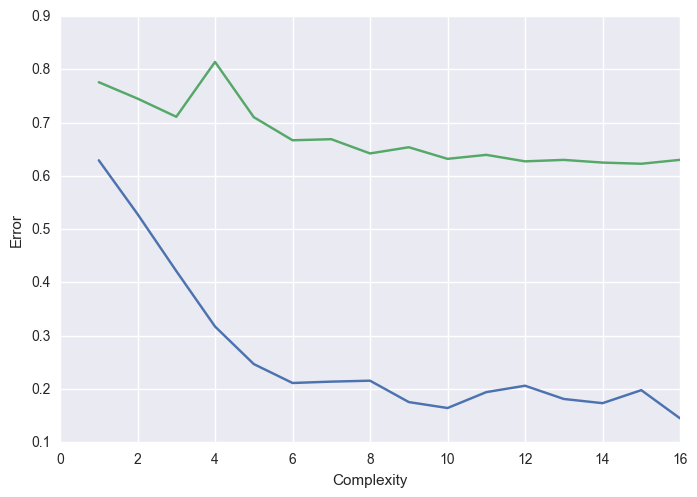

In [14]:
plt.plot(*zip(*nn_com_err))
plt.plot(*zip(*cv_com_err))
plt.xlabel('Complexity')
plt.ylabel('Error')
plt.show()